<a href="https://colab.research.google.com/github/vyshu89100/stockprediction1/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file = '/content/drive/MyDrive/GOOG.csv'
sd = pd.read_csv(file)
sd.head(5)


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [ ]:
sd.shape


(1258, 14)

In [ ]:
sd.describe()


,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [ ]:
sd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


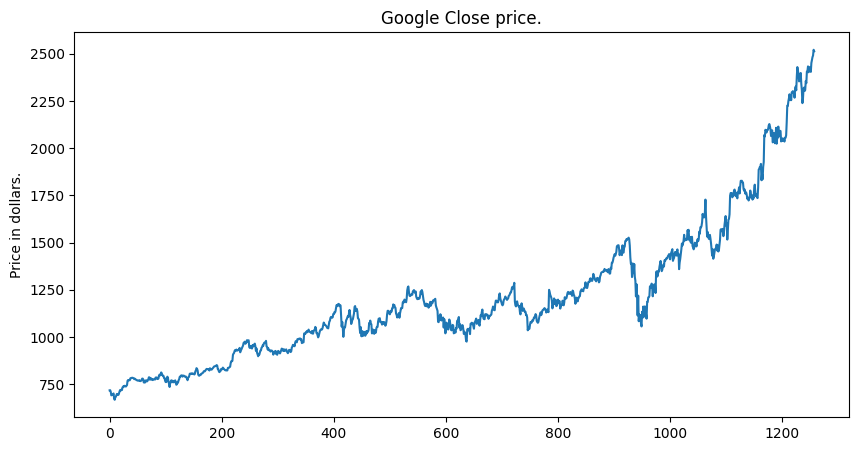

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(sd['close'])
plt.title('Google Close price.', fontsize=12)
plt.ylabel('Price in dollars.')
plt.show()


In [ ]:
sd.head()


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


sd[sd['close'] == sd['adjClose']].shape


In [ ]:
sd.isnull().sum()


symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

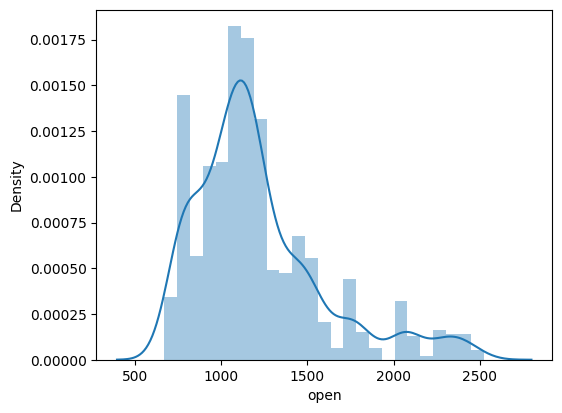

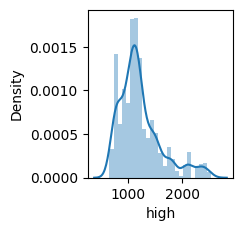

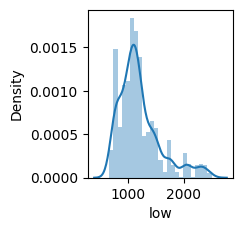

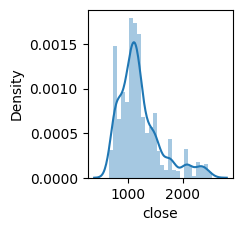

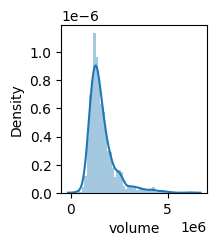

In [ ]:
features = ['open', 'high', 'low', 'close', 'volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(sd[col])
  plt.show()


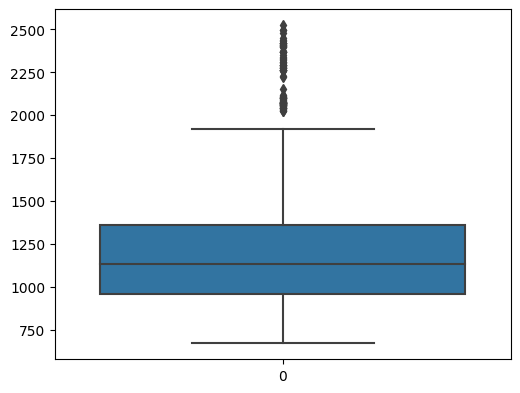

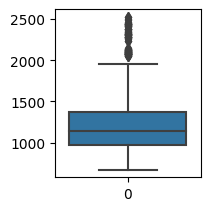

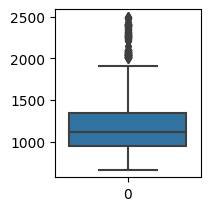

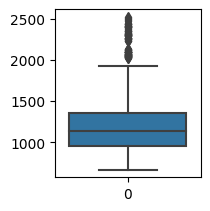

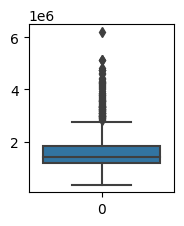

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(sd[col])
  plt.show()


In [ ]:
sd.corr()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
close,1.000000,0.999528,0.999586,0.999083,-0.025574,1.000000,0.999528,0.999586,0.999083,-0.025574,NaN,NaN
high,0.999528,1.000000,0.999354,0.999575,-0.012470,0.999528,1.000000,0.999354,0.999575,-0.012470,NaN,NaN
low,0.999586,0.999354,1.000000,0.999499,-0.035184,0.999586,0.999354,1.000000,0.999499,-0.035184,NaN,NaN
open,0.999083,0.999575,0.999499,1.000000,-0.021381,0.999083,0.999575,0.999499,1.000000,-0.021381,NaN,NaN
volume,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,NaN,NaN
adjClose,1.000000,0.999528,0.999586,0.999083,-0.025574,1.000000,0.999528,0.999586,0.999083,-0.025574,NaN,NaN
adjHigh,0.999528,1.000000,0.999354,0.999575,-0.012470,0.999528,1.000000,0.999354,0.999575,-0.012470,NaN,NaN
adjLow,0.999586,0.999354,1.000000,0.999499,-0.035184,0.999586,0.999354,1.000000,0.999499,-0.035184,NaN,NaN
adjOpen,0.999083,0.999575,0.999499,1.000000,-0.021381,0.999083,0.999575,0.999499,1.000000,-0.021381,NaN,NaN
adjVolume,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,NaN,NaN


In [ ]:
sd.groupby('open').mean()


,close,high,low,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
open,,,,,,,,,,,
671.00,668.26,672.3000,663.2840,2641085.0,668.26,672.3000,663.2840,671.00,2641085.0,0.0,1.0
675.17,675.22,689.4000,673.4500,4449022.0,675.22,689.4000,673.4500,675.17,4449022.0,0.0,1.0
678.97,680.04,680.3300,673.0000,2173762.0,680.04,680.3300,673.0000,678.97,2173762.0,0.0,1.0
683.00,684.11,687.4292,681.4100,1932561.0,684.11,687.4292,681.4100,683.00,1932561.0,0.0,1.0
685.47,692.10,692.3200,683.6500,1597714.0,692.10,692.3200,683.6500,685.47,1597714.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2451.32,2466.09,2468.0000,2441.0725,1192453.0,2466.09,2468.0000,2441.0725,2451.32,1192453.0,0.0,1.0
2479.90,2482.85,2494.4950,2468.2400,1253253.0,2482.85,2494.4950,2468.2400,2479.90,1253253.0,0.0,1.0
2494.01,2521.60,2523.2600,2494.0000,1561733.0,2521.60,2523.2600,2494.0000,2494.01,1561733.0,0.0,1.0


In [ ]:
sd['open-close'] = sd['open'] - sd['close']
sd['low-high'] = sd['low'] - sd['high']
sd['target'] = np.where(sd['close'].shift(-1) > sd['close'], 1, 0)


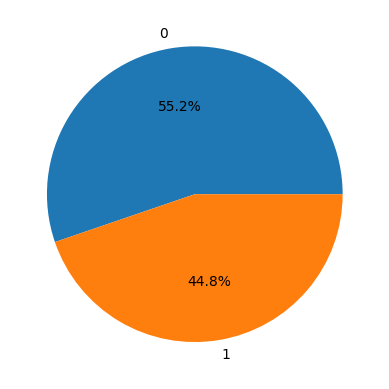

In [ ]:
plt.pie(sd['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


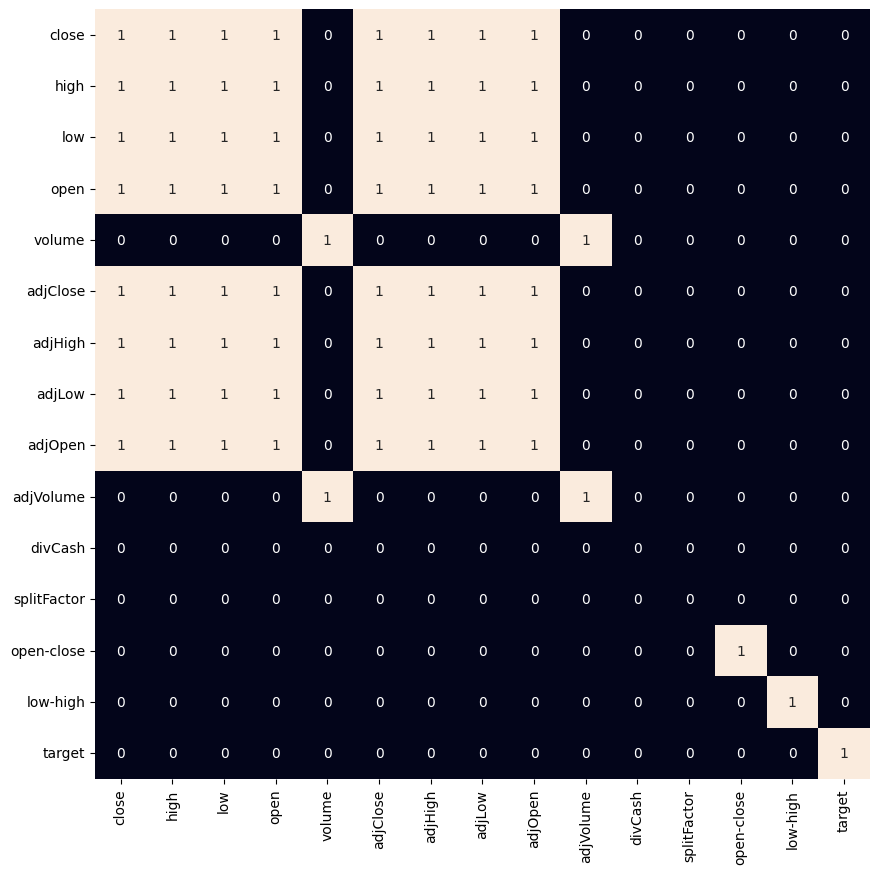

In [ ]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(sd.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [ ]:
features = sd[['open-close', 'low-high', 'volume']]
target = sd['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(1132, 3) (126, 3)


In [ ]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

print(f'{models[i]} : ')
print('Training Accuracy : ', metrics.roc_auc_score(
	Y_train, models[i].predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(
	Y_valid, models[i].predict_proba(X_valid)[:,1]))
print()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9989960726868631
Validation Accuracy :  0.5306381896770913

